### Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

### Import Data

In [3]:
import pandas as pd
data = pd.read_csv('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
y = data['label']
x = data.drop(columns = ['label'])

### Exploratory Data Analysis (EDA)

In [5]:
tabular_data = pd.read_csv('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}

### Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

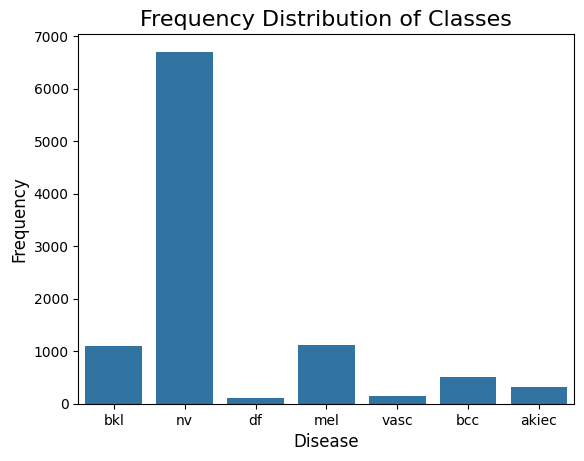

In [7]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

### Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

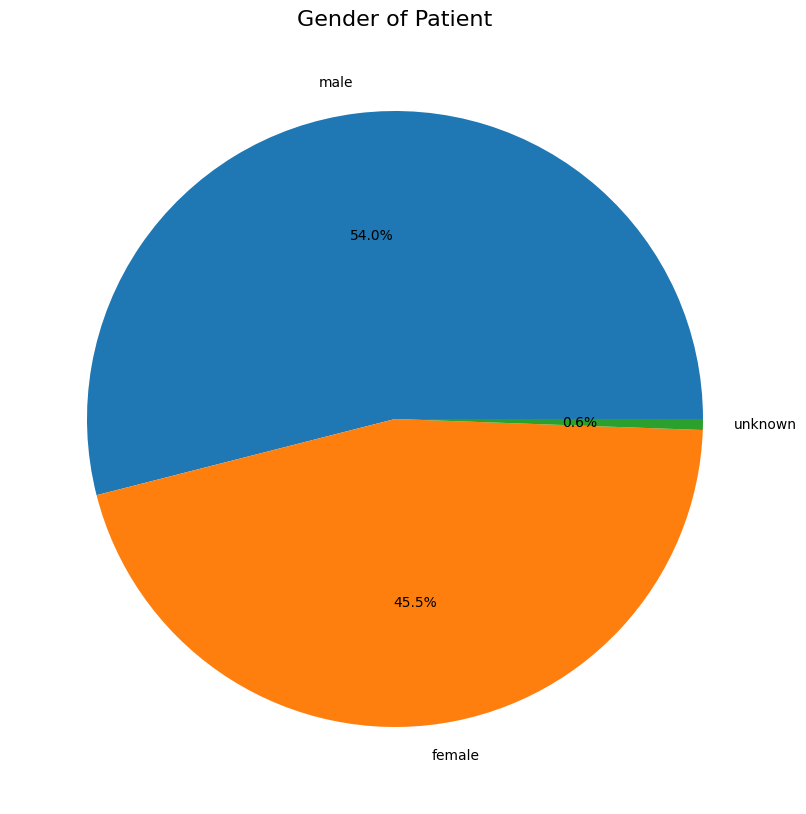

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

### Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

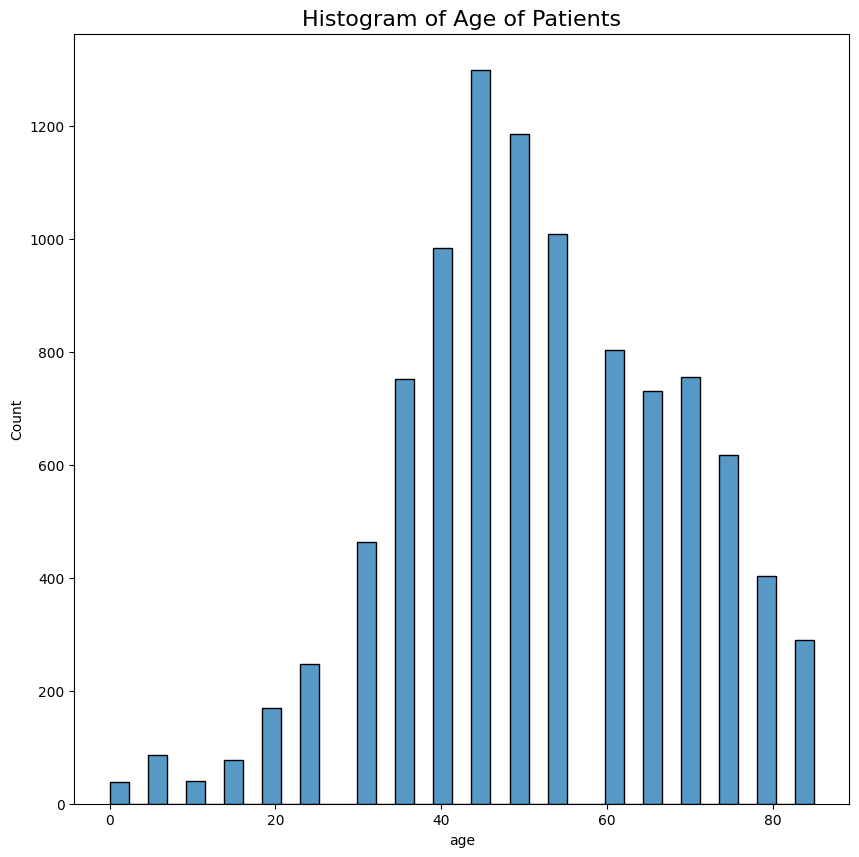

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

### Location of disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

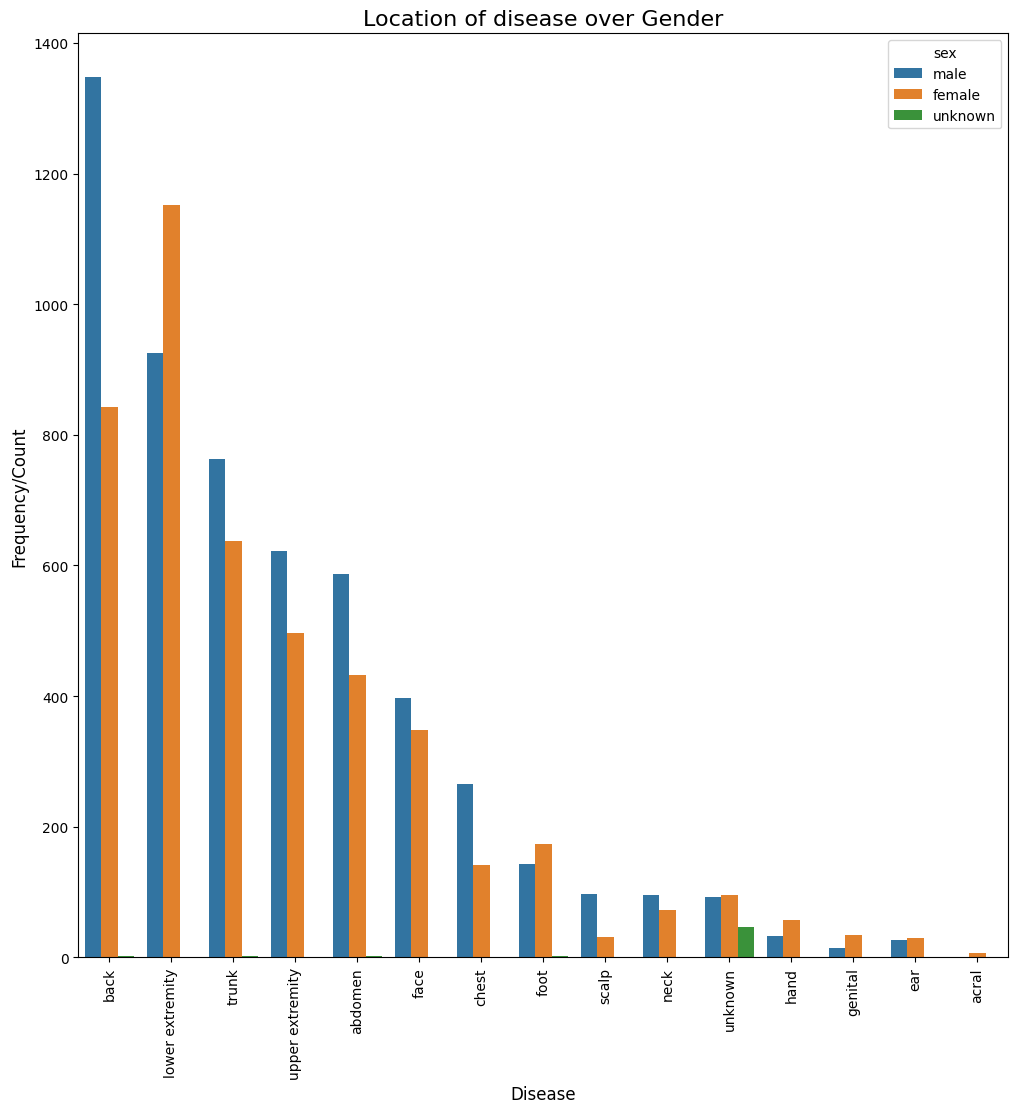

In [10]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

### Oversampling (To overcome class imbalace)

In [11]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


### Standardization and Splitting Data

In [13]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

## Model Training

In [14]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [16]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20


235/235 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.4949
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 10s 36ms/step - loss: 1.2731 - accuracy: 0.4949 - val_loss: 0.9610 - val_accuracy: 0.6341
Epoch 2/20
  3/235 [..............................] - ETA: 7s - loss: 0.9857 - accuracy: 0.6380

c:\users\mukhi2206\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - ETA: 0s - loss: 0.7490 - accuracy: 0.7213
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 8s 33ms/step - loss: 0.7490 - accuracy: 0.7213 - val_loss: 0.5773 - val_accuracy: 0.7895
Epoch 3/20
233/235 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.8292
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 8s 33ms/step - loss: 0.4752 - accuracy: 0.8297 - val_loss: 0.3989 - val_accuracy: 0.8602
Epoch 4/20
233/235 [============================>.] - ETA: 0s - loss: 0.3299 - accuracy: 0.8833
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 7s 32ms/step - loss: 0.3299 - accuracy: 0.8834 - val_loss: 0.2952 - val_accuracy: 0.8945
Epoch 5/20
235/235 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.9198
Epoch 5: saving model to best_model.h5
235/235 [==============================] - 8s 32ms/step - loss: 0.2275 - ac

### Plot Accuracy and Loss

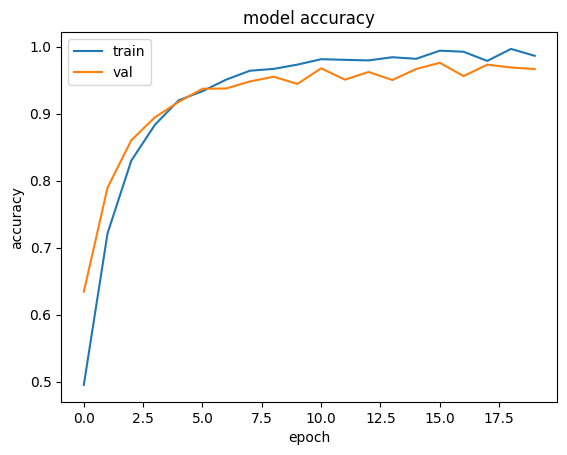

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

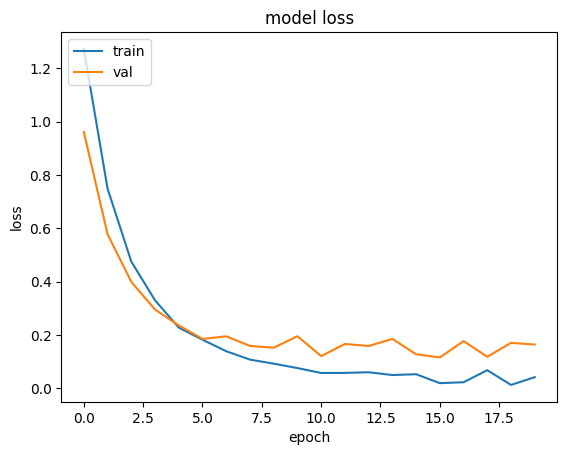

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.load_weights('best_model.h5')

### Model Testing

In [22]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1917 - accuracy: 0.9642 - 1s/epoch - 4ms/step


### Model Inference

1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')


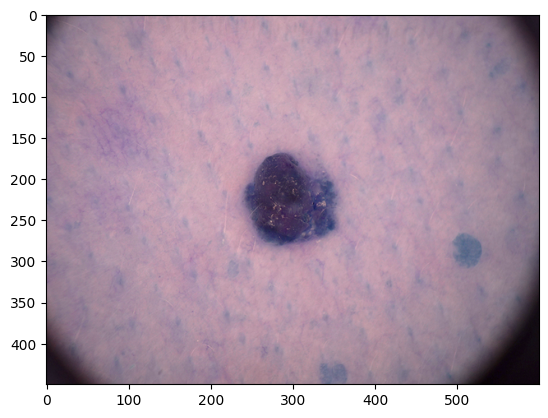

In [35]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER/HAM10000_images_part_1/ISIC_0029291.jpg')
plt.imshow(img)
img = cv2.resize(img, (28, 28))
result = model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
print(class_name)

1/1 [==============================] - 0s 26ms/step
('nv', ' melanocytic nevi')


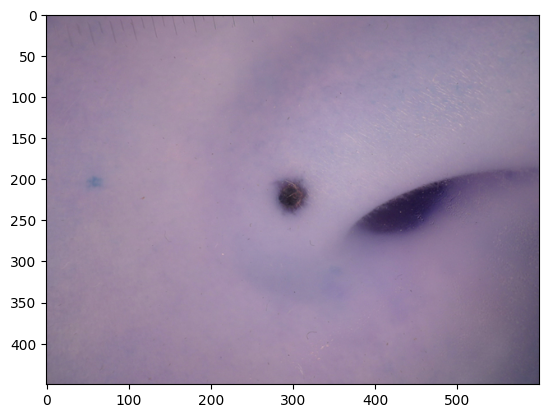

In [37]:
img = cv2.imread('C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER/HAM10000_images_part_1/ISIC_0024378.jpg')
plt.imshow(img)
img = cv2.resize(img, (28, 28))
result = model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_name = classes[class_ind]
print(class_name)

In [38]:
!pip install google.colab

  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102301 sha256=61072b06ca590f3cf31e8baa05b1c3b7448ae082235d4dd5dcab87572190d63f
  Stored in directory: c:\users\mukhi2206\appdata\local\pip\cache\wheels\a8\c1\f9\565bc1832dda03cc21db8c8751487357f616112b6113bbf9bb
  Running setup.py clean for pandas
  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13382 sha256=d7f3c85e97ecd7efca8ac249d2d0eddb7ccb54de50834950bdd002809a9c7b8b
  Stored in directory: c:\users\mukhi2206\appdata\local\pip\cache\wheels\79\f4\2b\306dbe0f6b429a1ccb56aef907984a2f21bd6cb7f702b65d05
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5120 sha256=9e37a0e965f3f6d7a117d7c3bde2a0b9092aea8935d45a4da5caaa41aae5f427
  Stored in directory: c:\users\mukhi2206\appdata\local\pip\cache\wheels\a7\bd\0d\d95b629ee4a7368830202858e45ac76cd837a42cafa50da81e
  Created wheel for tornado: filename=tornado-4.5.3-cp39-cp39-win_amd64.whl s

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\mukhi2206\appdata\local\programs\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mukhi2206\\AppData\\Local\\Temp\\pip-install-kanv6phr\\pandas_16dbad852d8d4b01a1448c23194d11f9\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mukhi2206\\AppData\\Local\\Temp\\pip-install-kanv6phr\\pandas_16dbad852d8d4b01a1448c23194d11f9\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Mukhi2206\AppData\Local\Temp\pip-wheel-5d7_dlub'
       cwd: C:\Users\Mukhi2206\AppData\Local\Temp\pip-install-kanv6phr\pandas_16dbad852d8d4b01a1448c23194d11f9\
  Complete output (841 lines):
  running bdist_wheel
  running build
  running build_py
  creating

ModuleNotFoundError: No module named 'google.colab'

In [43]:
srcdir = 'C:/Users/Mukhi2206/Desktop/CAPSTONE/SKIN CANCER/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break

1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 25ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 31ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 26ms/step
('bcc', ' basal cell carcinoma')
1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 27ms/step
('bcc', ' basal cell carcinoma')
1/1 [==============================] - 0s 28ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 27ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 28ms/step
('nv', ' melanocytic nevi')
